In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

In [2]:
#import csv and saving to dataframe called diamonds_no_color
diamonds_no_color = pd.read_csv("diamonds_no_color.csv")

In [3]:
#evaluating starting data
diamonds_no_color.head()

,shape,carat,color,clarity,cut,authentication,ship date,price,natural
0,Round,0.30,K,I1,Very Good,GIA,43976,270,Natural
1,Round,0.30,H,I1,Good,GIA,43976,270,Natural
2,Round,0.30,K,SI2,Excellent,GIA,43976,280,Natural
3,Round,0.30,I,SI2,Excellent,GIA,43976,280,Natural
4,Round,0.41,K,I1,Good,GIA,43972,280,Natural


### Cleaning data / Reforming data

In [4]:
#getting rid of unsed ship_date column
diamonds_no_color = diamonds_no_color.drop(["ship date"],axis=1)

In [5]:
#adding column of price log
diamonds_no_color['price_log'] = np.log(diamonds_no_color['price'])

In [6]:
#lowercase all my variables // leaving the integers untouched
diamonds_no_color = diamonds_no_color.applymap(lambda s:s.lower() if type(s) == str else s)

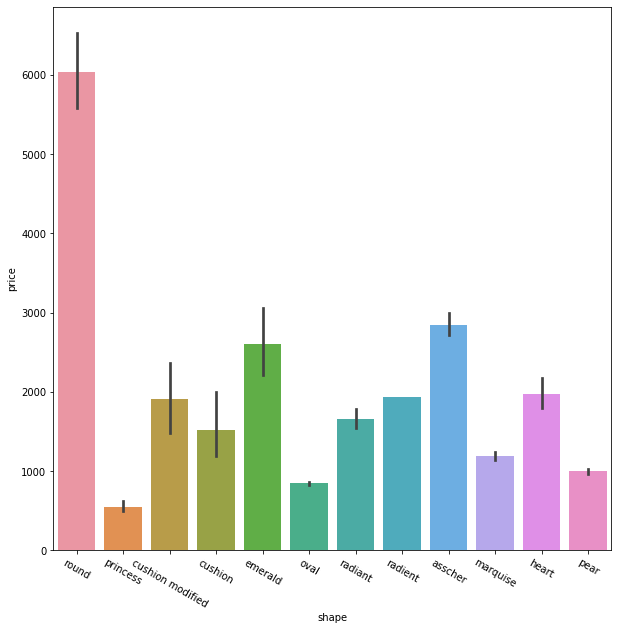

In [7]:
#seeing which shape is most expensive
f, ax1 = plt.subplots(figsize=(10, 10))
plt.xticks(rotation=330)
ax1 = sns.barplot(x='shape',y='price',data=diamonds_no_color)

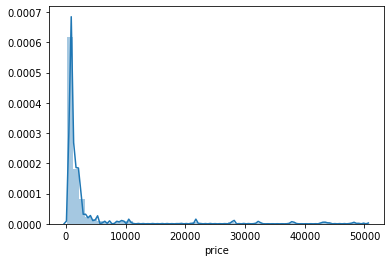

In [8]:
#data plot of pricing
sns.distplot(diamonds_no_color.price)

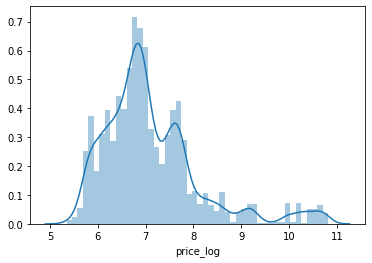

In [9]:
#data plot of pricing (log)
sns.distplot(diamonds_no_color.price_log)

In [10]:
#check the outliers and any crazy values for pricing
diamonds_no_color.price.describe()

count     7521.000000
mean      2863.097992
std       6886.059480
min        210.000000
25%        630.000000
50%       1000.000000
75%       1940.000000
max      50140.000000
Name: price, dtype: float64

In [11]:
# oridinal values that we need to change to integers
# color
# clarity
# cut
# Authentication
# natural

In [12]:
#checking color values
diamonds_no_color.color.value_counts()

e    1963
d    1247
f    1087
g     840
i     746
h     618
j     551
k     322
l      75
m      72
Name: color, dtype: int64

In [13]:
#checking clarity values
diamonds_no_color.clarity.value_counts()

vs2     1642
si1     1637
vs1     1525
si2     1072
vvs2     679
vvs1     502
i1       379
if        85
Name: clarity, dtype: int64

In [14]:
#checking authentication values
diamonds_no_color.authentication.value_counts()

gia    5346
igi    2114
ags      42
gsi      19
Name: authentication, dtype: int64

In [15]:
#checking natural values
diamonds_no_color.natural.value_counts()

natural        5467
lab_created    2054
Name: natural, dtype: int64

In [16]:
#checking color values
diamonds_no_color.cut.value_counts()

-              4280
excellent      1248
very good       881
ideal           846
good            219
true hearts      47
Name: cut, dtype: int64

In [17]:
#rearranging value in color/shape so we can work with it properly
diamonds_no_color.cut = diamonds_no_color.cut.replace(["-","very good","true hearts"],['unknown','very_good','true_hearts'])
diamonds_no_color['shape'] = diamonds_no_color['shape'].replace(["cushion modified"],["cushion_modified"])

In [18]:
#settings all ordinal values for each variable within specificed columns
diamond_cut_quality = {'true_hearts':50,
                       'excellent':40,
                       'ideal':30,
                       'very_good':20,
                       'good':10,
                       'unknown':0}

diamond_clear_color = {'d':100,
                 'e':90,
                 'f':80,
                 'g':70,
                 'h':60,
                 'i':50,
                 'j':40,
                 'k':30,
                 'l':20,
                 'm':10}


diamond_clarity = {'if':80,
                   'vvs1':70,
                   'vvs2':60,
                   'vs1':50,
                   'vs2':40,
                   'si1':30,
                   'si2':20,
                   'i1':10}
diamond_authentication_grade = {'gia':50,
                         'ags':40,
                         'igi':30,
                         'gsi':20}
diamond_making_process = {'natural':20,
                         'lab_created':10}

In [19]:
#mapping the changed ordinal vales to the specific columns
diamonds_no_color.cut = diamonds_no_color.cut.map(diamond_cut_quality);
diamonds_no_color.color = diamonds_no_color.color.map(diamond_clear_color);
diamonds_no_color.clarity = diamonds_no_color.clarity.map(diamond_clarity);
diamonds_no_color.authentication = diamonds_no_color.authentication.map(diamond_authentication_grade);
diamonds_no_color.natural = diamonds_no_color.natural.map(diamond_making_process);

In [20]:
#creating dummy variables for shape
diamonds_no_color = pd.get_dummies(diamonds_no_color, columns = ['shape'], drop_first=True)

In [21]:
diamonds_no_color.columns

Index(['carat', 'color', 'clarity', 'cut', 'authentication', 'price',
       'natural', 'price_log', 'shape_cushion', 'shape_cushion_modified',
       'shape_emerald', 'shape_heart', 'shape_marquise', 'shape_oval',
       'shape_pear', 'shape_princess', 'shape_radiant', 'shape_radient',
       'shape_round'],
      dtype='object')

### 4 C of diamonds
### price

In [23]:
#polynominal features
#OLS Model of the 4C of diamonds compared to price
ols_model1 = ols(formula='price~carat+color+clarity+cut', data=diamonds_no_color).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     8562.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        09:01:44   Log-Likelihood:                -70687.
No. Observations:                7521   AIC:                         1.414e+05
Df Residuals:                    7516   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7764.0746    155.687    -49.870      0.000   -8069.265   -7458.884
carat        1.05e+04     60.239    174.371      0.000    1.04e+04    1.06e+04
color          9.6039      1.549      6.201      0.000       6.568      12.640
clarity       29.6694      2.099     14.132      0.000      25.554      33.785
cut           73.7279      2.143     34.398      0.000      69.526      77.930
==============================================================================
Omnibus:                     4000.741   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98516.066
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      20.256   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Natural
### authentication

In [24]:
#polynominal features
#checking to see if the diamond being authenticated while the diamond being lab-grown or naturally farmed has any correlation to price
ols_model2a = ols(formula='natural~authentication', data=diamonds_no_color).fit()
ols_model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                natural   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.182e+05
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        09:01:45   Log-Likelihood:                -11317.
No. Observations:                7521   AIC:                         2.264e+04
Df Residuals:                    7519   BIC:                         2.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.8197      0.063    -61.012      0.000      -3.942      -3.697
authentication     0.4766      0.001    343.842      0.000       0.474       0.479
==============================================================================
Omnibus:                     9833.484   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1234985.679
Skew:                           7.606   Prob(JB):                         0.00
Kurtosis:                      63.906   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### price
### authentication and Natural

In [25]:
ols_model2b = ols(formula='price~authentication+natural', data=diamonds_no_color).fit()
ols_model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     42.49
Date:                Fri, 08 May 2020   Prob (F-statistic):           4.48e-19
Time:                        09:01:48   Log-Likelihood:                -77094.
No. Observations:                7521   AIC:                         1.542e+05
Df Residuals:                    7518   BIC:                         1.542e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2337.0606    481.115      4.858      0.000    1393.940    3280.181
authentication  -180.0815     35.627     -5.055      0.000    -249.920    -110.243
natural          491.8682     72.480      6.786      0.000     349.787     633.949
==============================================================================
Omnibus:                     6872.746   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178948.032
Skew:                           4.605   Prob(JB):                         0.00
Kurtosis:                      25.050   Cond. No.                         297.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#any correlation between shapes and price
ols_model3 = ols(formula='price~shape_cushion+shape_cushion_modified+shape_emerald+shape_heart+shape_marquise+shape_oval+shape_pear+shape_princess+shape_radiant+shape_radient+shape_round', data=diamonds_no_color).fit()
ols_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     75.27
Date:                Fri, 08 May 2020   Prob (F-statistic):          1.98e-161
Time:                        09:01:50   Log-Likelihood:                -76743.
No. Observations:                7521   AIC:                         1.535e+05
Df Residuals:                    7509   BIC:                         1.536e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2844.5098    289.594      9.822      0.000    2276.825    3412.195
shape_cushion          -1321.8698    652.711     -2.025      0.043   -2601.366     -42.373
shape_cushion_modified  -941.3974    412.007     -2.285      0.022   -1749.047    -133.748
shape_emerald           -241.8577    433.509     -0.558      0.577   -1091.657     607.941
shape_heart             -878.3739    417.939     -2.102      0.036   -1697.652     -59.096
shape_marquise         -1652.0483    421.742     -3.917      0.000   -2478.781    -825.315
shape_oval             -1999.9524    361.398     -5.534      0.000   -2708.394   -1291.511
shape_pear             -1847.3250    361.047     -5.117      0.000   -2555.077   -1139.573
shape_princess         -2295.6765    415.897     -5.520      0.000   -3110.952   -1480.401
shape_radiant          -1193.5352    417.709     -2.857      0.004   -2012.362    -374.709
shape_radient           -904.5098   6546.355     -0.138      0.890   -1.37e+04    1.19e+04
shape_round             3196.7849    320.569      9.972      0.000    2568.380    3825.190
==============================================================================
Omnibus:                     6356.215   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143232.244
Skew:                           4.125   Prob(JB):                         0.00
Kurtosis:                      22.723   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#any correlation between price once you take out the 4Cs
ols_model3 = ols(formula='price~authentication+natural+shape_cushion+shape_cushion_modified+shape_emerald+shape_heart+shape_marquise+shape_oval+shape_pear+shape_princess+shape_radiant+shape_radient+shape_round', data=diamonds_no_color).fit()
ols_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     68.87
Date:                Fri, 08 May 2020   Prob (F-statistic):          1.57e-172
Time:                        09:01:51   Log-Likelihood:                -76713.
No. Observations:                7521   AIC:                         1.535e+05
Df Residuals:                    7507   BIC:                         1.536e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1772.6268    578.716      3.063      0.002     638.182    2907.072
authentication          -150.8940     34.424     -4.383      0.000    -218.375     -83.413
natural                  430.4805     71.367      6.032      0.000     290.580     570.381
shape_cushion           -845.2222    653.882     -1.293      0.196   -2127.014     436.570
shape_cushion_modified  -655.3325    412.193     -1.590      0.112   -1463.346     152.681
shape_emerald           1045.2375    469.350      2.227      0.026     125.181    1965.294
shape_heart             -825.4231    417.560     -1.977      0.048   -1643.958      -6.888
shape_marquise         -1688.1882    421.091     -4.009      0.000   -2513.644    -862.732
shape_oval             -1355.8957    370.140     -3.663      0.000   -2081.474    -630.317
shape_pear             -1196.8898    369.847     -3.236      0.001   -1921.893    -471.886
shape_princess         -2235.0820    415.565     -5.378      0.000   -3049.705   -1420.459
shape_radiant          -1326.9475    416.435     -3.186      0.001   -2143.278    -510.617
shape_radient          -3915.4173   6553.998     -0.597      0.550   -1.68e+04    8932.254
shape_round             3406.6736    320.459     10.631      0.000    2778.484    4034.864
==============================================================================
Omnibus:                     6319.443   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140436.394
Skew:                           4.093   Prob(JB):                         0.00
Kurtosis:                      22.522   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#look for correlation thru all variables
diamonds_no_color.corr()

,carat,color,clarity,cut,authentication,price,natural,price_log,shape_cushion,shape_cushion_modified,shape_emerald,shape_heart,shape_marquise,shape_oval,shape_pear,shape_princess,shape_radiant,shape_radient,shape_round
carat,1.000000,-0.024321,-0.019826,0.151371,-0.142470,0.887511,-0.121893,0.890753,-0.005812,-0.013142,0.112711,-0.001302,-0.070499,-0.112891,-0.096589,-0.168412,0.000094,0.003444,0.182613
color,-0.024321,1.000000,0.050533,-0.205301,-0.392283,-0.022195,-0.413276,0.058788,0.024247,-0.022534,0.140341,0.022851,-0.020856,0.139068,0.148970,0.073391,-0.080024,-0.017546,-0.215311
clarity,-0.019826,0.050533,1.000000,-0.046089,-0.063552,0.045724,-0.065434,0.066150,-0.020604,0.034419,0.066324,-0.034863,-0.077533,0.029085,0.078506,0.060906,-0.064479,-0.014161,-0.130359
cut,0.151371,-0.205301,-0.046089,1.000000,0.170026,0.295157,0.177287,0.105429,-0.103643,0.158455,-0.191676,-0.206062,-0.202302,-0.296703,-0.297626,0.183388,-0.206295,-0.009193,0.805530
authentication,-0.142470,-0.392283,-0.063552,0.170026,1.000000,0.071549,0.969642,-0.060047,-0.052876,0.041595,-0.377241,0.141653,0.153062,-0.179301,-0.174907,0.141715,0.115249,-0.018124,0.094013
price,0.887511,-0.022195,0.045724,0.295157,0.071549,1.000000,0.088409,0.794734,-0.025309,-0.037126,-0.009094,-0.033670,-0.061569,-0.109103,-0.101167,-0.087756,-0.045552,-0.001546,0.302810
natural,-0.121893,-0.413276,-0.065434,0.177287,0.969642,0.088409,1.000000,-0.033174,-0.048698,0.033609,-0.390935,0.136261,0.155541,-0.191810,-0.190117,0.135623,0.142615,0.007068,0.102822
price_log,0.890753,0.058788,0.066150,0.105429,-0.060047,0.794734,-0.033174,1.000000,-0.009094,-0.059809,0.092391,0.082837,-0.035933,-0.152530,-0.124764,-0.235112,0.047555,0.005163,0.156406
shape_cushion,-0.005812,0.024247,-0.020604,-0.103643,-0.052876,-0.025309,-0.048698,-0.009094,1.000000,-0.034619,-0.031257,-0.033603,-0.032989,-0.048384,-0.048534,-0.033944,-0.033641,-0.001499,-0.085288
shape_cushion_modified,-0.013142,-0.022534,0.034419,0.158455,0.041595,-0.037126,0.033609,-0.059809,-0.034619,1.000000,-0.064024,-0.068829,-0.067573,-0.099105,-0.099413,-0.069528,-0.068907,-0.003071,-0.174697


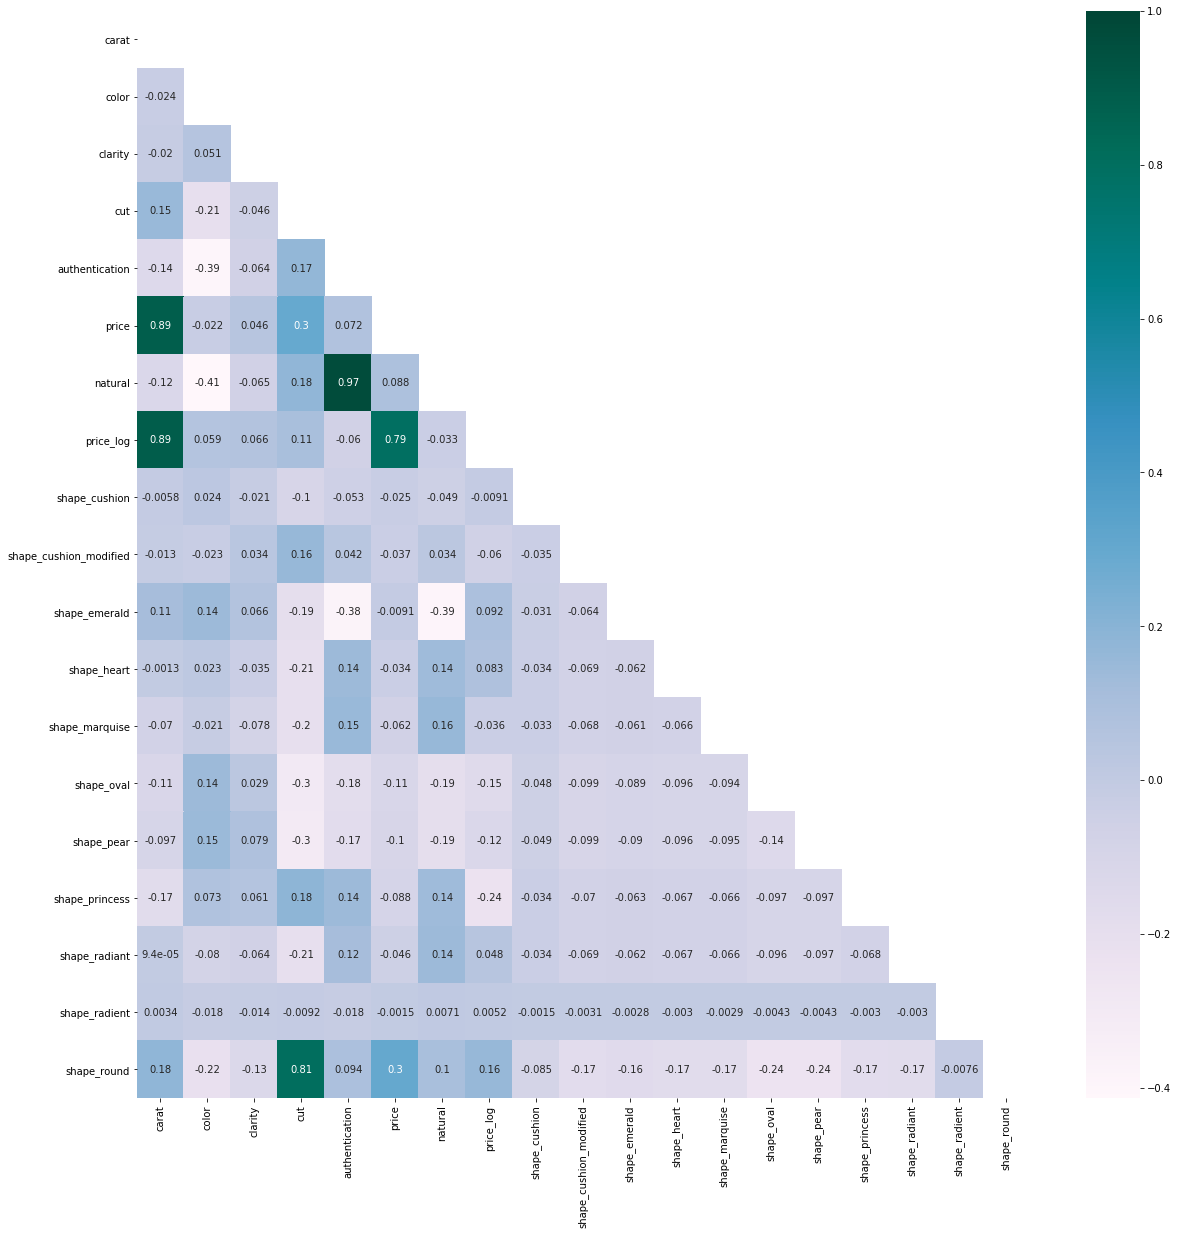

In [29]:
#mapping correlation
corr = diamonds_no_color.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax2 = plt.subplots(figsize=(20, 20))
ax2 = sns.heatmap(corr,mask=mask,cmap="PuBuGn",annot = True)

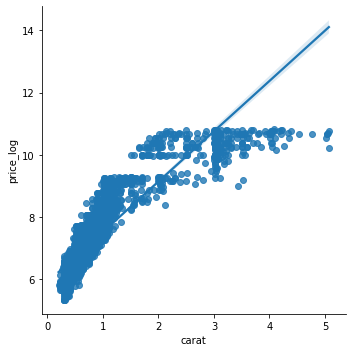

In [30]:
#linear model of diamond pricing-log- and carats
sns.lmplot(y='price_log',x='carat',data = diamonds_no_color,fit_reg=True)

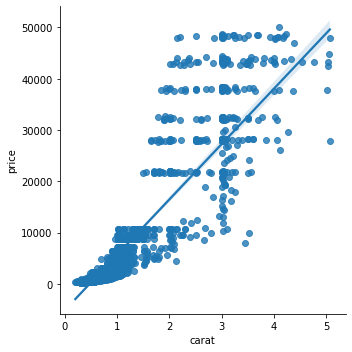

In [31]:
#linear model of diamond pricing - and carats
sns.lmplot(y='price',x='carat',data = diamonds_no_color,fit_reg=True)

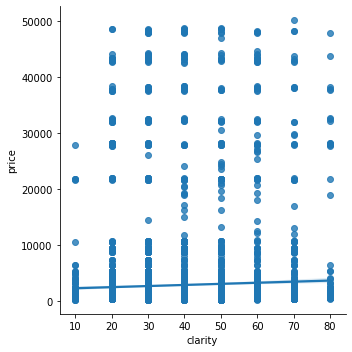

In [32]:
sns.lmplot(y='price',x='clarity',data = diamonds_no_color,fit_reg=True)

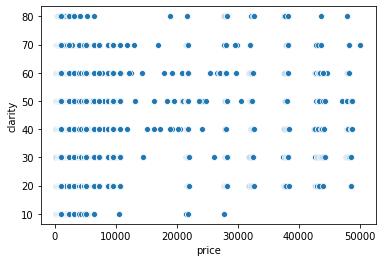

In [33]:
sns.scatterplot(diamonds_no_color.price,diamonds_no_color.clarity)

In [30]:
diamonds_no_color.to_csv('diamonds_no_color_cleaned.csv',index = True)